# 1. Importing the basic required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Dataset

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
# observation :-
## to get rid of unicode error => error if the dataset contains characters that can't be decoded using UTF-8

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 3. Cleaning

In [5]:
# observation :-
## renaming the 1st and second column
df = df.rename(columns={"v1":"Output","v2":"Input_text"})
df.head(2)

,Output,Input_text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [6]:
df.isnull().sum()

Output           0
Input_text       0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Output      5572 non-null   object
 1   Input_text  5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# observation :-
### we have null data in the unnamed columns only 
### first two columns we have data in all rows

In [9]:
df["Output"].value_counts()

Output
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
## dropping the duplicated columns
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Output      5169 non-null   object
 1   Input_text  5169 non-null   object
 2   Unnamed: 2  43 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  5 non-null      object
dtypes: object(5)
memory usage: 242.3+ KB


In [13]:
# observation :-
### as we have only two tyes one is ham and another spam , so we use LABEL-ECONDING technique for FEATURE-ENCODING

# 4. FEATURE-ECNODING FOR OUTPUT FEATURE
- using LABEL-ENCODING

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoding = LabelEncoder()

In [16]:
df["Output"]= encoding.fit_transform(df["Output"])

In [17]:
df.sample(2)

,Output,Input_text,Unnamed: 2,Unnamed: 3,Unnamed: 4
939,0,Better. Made up for Friday and stuffed myself ...,NaN,NaN,NaN
1321,0,"I wake up long ago already... Dunno, what othe...",NaN,NaN,NaN


In [18]:
df["Output"].value_counts()

Output
0    4516
1     653
Name: count, dtype: int64

In [19]:
# observation :-
#### 0 for ham
#### 1 for spam

# 5. EDA

C:\Users\heman\AppData\Local\Temp\ipykernel_21048\3916798741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Output",palette="husl")


Text(0.5, 1.0, 'Spam vs Ham Distribution')

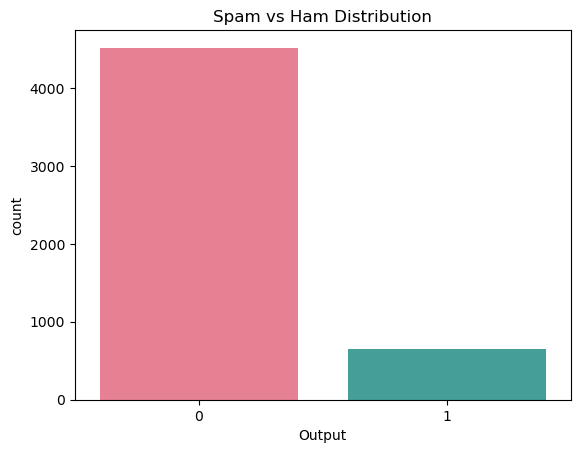

In [20]:
sns.countplot(data=df,x="Output",palette="husl")
plt.title('Spam vs Ham Distribution')

In [21]:
hampercent = (df["Output"]==0).sum()*100/len(df)
spampercent = (df["Output"]==1).sum()*100/len(df)
print("percentage of ham data in df :",hampercent)
print("percentage of spam data in df :",spampercent)

percentage of ham data in df : 87.3669955503966
percentage of spam data in df : 12.633004449603405


([<matplotlib.patches.Wedge at 0x1f8d70da060>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63%')])

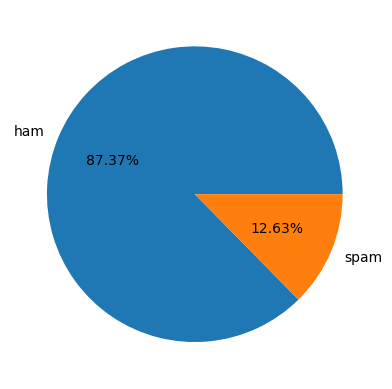

In [22]:
plt.pie(df["Output"].value_counts(),labels=["ham","spam"],autopct="%1.2f%%")

In [23]:
# observation :-
#### it says we have imbalanced dataset as the percetage of ham is very very high than spam, so our model can get biased

# 6. DEEP CLEANING

In [24]:
df['Lower_text'] = df['Input_text'].apply(lambda text: text.lower())

In [25]:
df.head()

,Output,Input_text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Lower_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"nah i don't think he goes to usf, he lives aro..."


In [26]:
#### removing the feature wuth unnamed as it has 
Unnamed2 = df["Unnamed: 2"].isna().sum()*100/len(df)
Unnamed3 = df["Unnamed: 3"].isna().sum()*100/len(df)
Unnamed4 = df["Unnamed: 4"].isna().sum()*100/len(df)
print("percentage of null values in Unnamed2 :",Unnamed2)
print("percentage of null values in Unnamed3 :",Unnamed3)
print("percentage of null values in Unnamed42 :",Unnamed4)

percentage of null values in Unnamed2 : 99.1681176242987
percentage of null values in Unnamed3 : 99.80653898239505
percentage of null values in Unnamed42 : 99.90326949119752


Text(0.5, 1.0, 'Unnamed: 4')

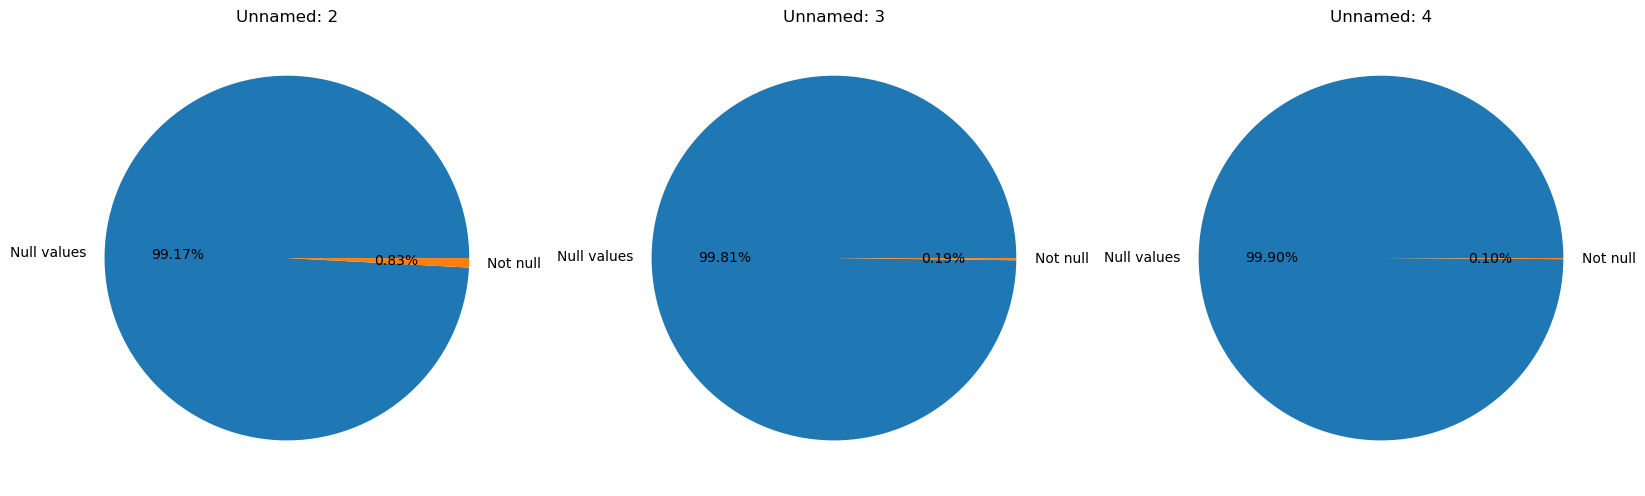

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
null_count = df["Unnamed: 2"].isna().sum()
not_null_count = df["Unnamed: 2"].notna().sum()
plt.pie([null_count, not_null_count],labels=["Null values", "Not null"],autopct="%1.2f%%")
plt.title("Unnamed: 2")


plt.subplot(1,3,2)
null_count = df["Unnamed: 3"].isna().sum()
not_null_count = df["Unnamed: 3"].notna().sum()
plt.pie([null_count, not_null_count],labels=["Null values", "Not null"],autopct="%1.2f%%")
plt.title("Unnamed: 3")

plt.subplot(1,3,3)
null_count = df["Unnamed: 4"].isna().sum()
not_null_count = df["Unnamed: 4"].notna().sum()
plt.pie([null_count, not_null_count],labels=["Null values", "Not null"],autopct="%1.2f%%")
plt.title("Unnamed: 4")

In [28]:
# Observation:-
#### as we have more than 75% nan values in the data

In [29]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [30]:
df.head(2)

,Output,Input_text,Lower_text
0,0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...


In [31]:
df.drop("Input_text",axis=1,inplace=True)
df.head(1)

,Output,Lower_text
0,0,"go until jurong point, crazy.. available only ..."


#### using nltk for some data cleaning . nltk=natural language toolkit

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
nltk.download('PorterStemmer')

[nltk_data] Error loading PorterStemmer: Package 'PorterStemmer' not
[nltk_data]     found in index


False

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [35]:
stop_words = set(stopwords.words('english'))
### stop words are the words like "is,that " etc
ps = PorterStemmer()
### to change the words to simple words like => running to run 

In [36]:
import string
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    ## removing the punctuations from text for word to word and defining it as text
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
    ## first we are stemming the word(going to go) in text.split(means for every word) and if word exists in stop_words we wont join to empty string . else we do , such that we can create a new String
    return text

df['clean_text'] = df['Lower_text'].apply(clean_text)

In [37]:
df.sample(5)

,Output,Lower_text,clean_text
3114,0,i wait 4 ì_ inside da car park...,wait 4 ì insid da car park
1060,0,i'm working technical support :)voice process....,im work technic support voic processnetwork field
1865,0,call to the number which is available in appoi...,call number avail appoint ask connect call wah...
1304,0,your right! i'll make the appointment right now.,right ill make appoint right
505,0,no it's waiting in e car dat's bored wat. cos ...,wait e car dat bore wat co wait outsid got not...


In [38]:
df.drop("Lower_text",axis=1,inplace=True)

In [39]:
df.sample(2)

,Output,clean_text
2421,0,err cud im go 8pm havent got way contact
2883,0,cbe realli good nowadayslot shop showroomsc sh...


In [ ]:
df.head()

,Output,clean_text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


#### adding some more feature for EDA purpose

In [41]:
df["text_length"] = df["clean_text"].apply(lambda text: len(text))

In [42]:
df.head()

,Output,clean_text,text_length
0,0,go jurong point crazi avail bugi n great world...,76
1,0,ok lar joke wif u oni,21
2,1,free entri 2 wkli comp win fa cup final tkt 21...,131
3,0,u dun say earli hor u c alreadi say,35
4,0,nah dont think goe usf live around though,41


In [43]:
df["word_length"] = df["clean_text"].apply(lambda text: len(text.split()))

In [44]:
df.head()

,Output,clean_text,text_length,word_length
0,0,go jurong point crazi avail bugi n great world...,76,16
1,0,ok lar joke wif u oni,21,6
2,1,free entri 2 wkli comp win fa cup final tkt 21...,131,23
3,0,u dun say earli hor u c alreadi say,35,9
4,0,nah dont think goe usf live around though,41,8


In [45]:
data = df["clean_text"]
len(data[1])

21

# 7. DEEP EDA

In [46]:
df[["text_length","word_length"]].corr()

,text_length,word_length
text_length,1.000000,0.968467
word_length,0.968467,1.000000


<Axes: >

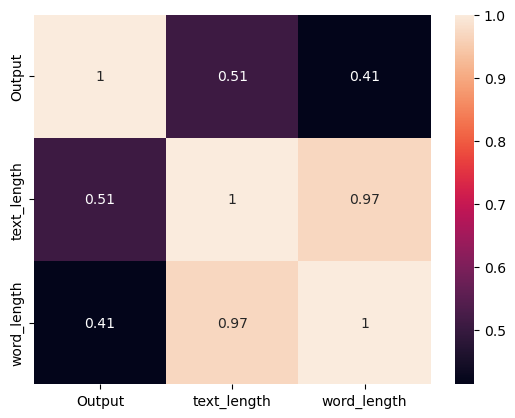

In [47]:
sns.heatmap(df[["Output","text_length","word_length"]].corr(),annot=True)

##### Observation:-
- "text_length" and the "word_length" are the most co-related , it may cause multi_collinearity , so using one feature is best
- "text_length" has more "co-relation" with the "Output" , so using "text_length" is better

<Axes: xlabel='text_length', ylabel='word_length'>

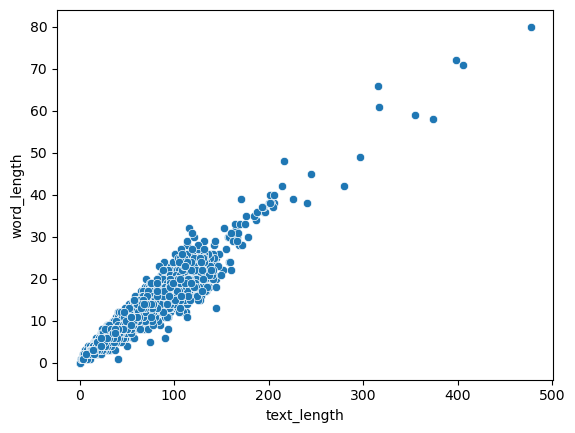

In [48]:
sns.scatterplot(data=df,x="text_length",y="word_length")
#### positive correlation

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
import wordcloud
from wordcloud import WordCloud

In [51]:
wc = WordCloud(width=800,height=800,min_font_size=10)

Text(0.5, 1.0, 'spam cloud(more words seen in spam)')

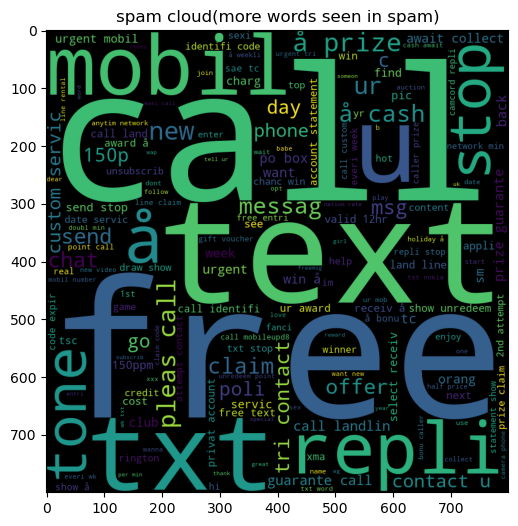

In [52]:
#### for the spam data we have
cloud_pic = wc.generate(df[df["Output"]==1]["clean_text"].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(cloud_pic)
plt.title("spam cloud(more words seen in spam)")
### imshow() says to_image.show()

Text(0.5, 1.0, 'ham cloud(more words seen in ham)')

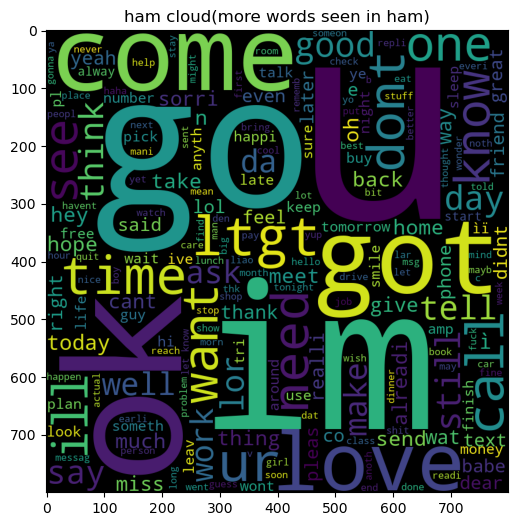

In [53]:
#### for the ham data we have
cloud_pic = wc.generate(df[df["Output"]==0]["clean_text"].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(cloud_pic)
plt.title("ham cloud(more words seen in ham)")
### imshow() says to_image.show()

# 8. Model building

In [54]:
df.head()

,Output,clean_text,text_length,word_length
0,0,go jurong point crazi avail bugi n great world...,76,16
1,0,ok lar joke wif u oni,21,6
2,1,free entri 2 wkli comp win fa cup final tkt 21...,131,23
3,0,u dun say earli hor u c alreadi say,35,9
4,0,nah dont think goe usf live around though,41,8


- using CountVectorizer

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts.

In [56]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["clean_text"]).toarray()

In [57]:
vectorizer.get_feature_names_out()

array(['008704050406', '0089mi', '0121', ..., 'ûïharri', 'ûò', 'ûówel'],
      dtype=object)

In [58]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
X.shape

(5169, 8038)

In [61]:
df.shape

(5169, 4)

In [62]:
len(X[0])

8038

In [58]:
y = df["Output"].values
y

array([0, 0, 1, ..., 0, 0, 0])

- using the navie_bayes model that is best for text input data
- we can use decision trees , it is not much affected by imbalance data

In [55]:
from sklearn.naive_bayes import BernoulliNB , MultinomialNB, GaussianNB

In [56]:
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
bnb.fit(X_train,y_train)
y_predbnb = bnb.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predbnb))
print("confusion matrix :- ",confusion_matrix(y_test,y_predbnb))
print("precision score :- ",precision_score(y_test,y_predbnb))

accuracy score :-  0.9671179883945842
confusion matrix :-  [[902   6]
 [ 28  98]]
precision score :-  0.9423076923076923


In [69]:
## we need to choose the model that is having best precision score

In [70]:
mnb.fit(X_train,y_train)
y_predmnb = mnb.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predmnb))
print("confusion matrix :- ",confusion_matrix(y_test,y_predmnb))
print("precision score :- ",precision_score(y_test,y_predmnb))

accuracy score :-  0.9729206963249516
confusion matrix :-  [[890  18]
 [ 10 116]]
precision score :-  0.8656716417910447


In [71]:
gnb.fit(X_train,y_train)
y_predgnb = gnb.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predgnb))
print("confusion matrix :- ",confusion_matrix(y_test,y_predgnb))
print("precision score :- ",precision_score(y_test,y_predgnb))

accuracy score :-  0.8752417794970987
confusion matrix :-  [[795 113]
 [ 16 110]]
precision score :-  0.49327354260089684


- using TfidfVectorizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean_text"]).toarray()

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [81]:
bnb.fit(X_train,y_train)
y_predbnb = bnb.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predbnb))
print("confusion matrix :- ",confusion_matrix(y_test,y_predbnb))
print("precision score :- ",precision_score(y_test,y_predbnb))

accuracy score :-  0.9671179883945842
confusion matrix :-  [[902   6]
 [ 28  98]]
precision score :-  0.9423076923076923


In [82]:
mnb.fit(X_train,y_train)
y_predmnb = mnb.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predmnb))
print("confusion matrix :- ",confusion_matrix(y_test,y_predmnb))
print("precision score :- ",precision_score(y_test,y_predmnb))

accuracy score :-  0.9497098646034816
confusion matrix :-  [[908   0]
 [ 52  74]]
precision score :-  1.0


In [83]:
gnb.fit(X_train,y_train)
y_predgnb = gnb.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predgnb))
print("confusion matrix :- ",confusion_matrix(y_test,y_predgnb))
print("precision score :- ",precision_score(y_test,y_predgnb))

accuracy score :-  0.874274661508704
confusion matrix :-  [[796 112]
 [ 18 108]]
precision score :-  0.4909090909090909


In [84]:
## here the best is tfidf -> mnb

- checking the precision_score and accuracy_score for different models

In [85]:
from sklearn.linear_model import LogisticRegression

In [89]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_predlog = logistic.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predlog))
print("confusion matrix :- ",confusion_matrix(y_test,y_predlog))
print("precision score :- ",precision_score(y_test,y_predlog))

accuracy score :-  0.9439071566731141
confusion matrix :-  [[906   2]
 [ 56  70]]
precision score :-  0.9722222222222222


In [90]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier()
rnf.fit(X_train,y_train)
y_predrnf = rnf.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predrnf))
print("confusion matrix :- ",confusion_matrix(y_test,y_predrnf))
print("precision score :- ",precision_score(y_test,y_predrnf))

accuracy score :-  0.9700193423597679
confusion matrix :-  [[908   0]
 [ 31  95]]
precision score :-  1.0


In [65]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_predsvm = svm.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predsvm))
print("confusion matrix :- ",confusion_matrix(y_test,y_predsvm))
print("precision score :- ",precision_score(y_test,y_predsvm))

accuracy score :-  0.9661508704061895
confusion matrix :-  [[908   0]
 [ 35  91]]
precision score :-  1.0


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_predgbc = gbc.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predgbc))
print("confusion matrix :- ",confusion_matrix(y_test,y_predgbc))
print("precision score :- ",precision_score(y_test,y_predgbc))

accuracy score :-  0.9632495164410058
confusion matrix :-  [[903   5]
 [ 33  93]]
precision score :-  0.9489795918367347


In [61]:
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df["clean_text"]).toarray()

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
mnb.fit(X_train,y_train)
y_predmnb = mnb.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predmnb))
print("confusion matrix :- ",confusion_matrix(y_test,y_predmnb))
print("precision score :- ",precision_score(y_test,y_predmnb))

accuracy score :-  0.9680851063829787
confusion matrix :-  [[908   0]
 [ 33  93]]
precision score :-  1.0


In [75]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier()
rnf.fit(X_train,y_train)
y_predrnf = rnf.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predrnf))
print("confusion matrix :- ",confusion_matrix(y_test,y_predrnf))
print("precision score :- ",precision_score(y_test,y_predrnf))

accuracy score :-  0.9748549323017408
confusion matrix :-  [[908   0]
 [ 26 100]]
precision score :-  1.0


In [76]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_predsvm = svm.predict(X_test)
print("accuracy score :- ",accuracy_score(y_test,y_predsvm))
print("confusion matrix :- ",confusion_matrix(y_test,y_predsvm))
print("precision score :- ",precision_score(y_test,y_predsvm))

accuracy score :-  0.9729206963249516
confusion matrix :-  [[908   0]
 [ 28  98]]
precision score :-  1.0


#### Uisng the Naive_Bayes as it is faster than SVC

## Pickling

In [65]:
import pickle

In [67]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("NaiveBayes_model.pkl","wb"))

In [69]:
pickle_vectorizer = pickle.load(open("vectorizer.pkl","rb"))
pickle_model = pickle.load(open("NaiveBayes_model.pkl","rb"))

In [94]:
text1 = "Limited offer! Get 80% discount on all products. Shop now!"

In [95]:
vector = pickle_vectorizer.transform([text1])
pickle_model.predict(vector)

array([0])

In [96]:
text2 = "Hey, are we still meeting for lunch at 1 PM today?"
vector = pickle_vectorizer.transform([text2])
pickle_model.predict(vector)

array([0])

In [97]:
text3 = "Don't forget to submit your assignment by tonight."
vector = pickle_vectorizer.transform([text3])
pickle_model.predict(vector)

array([0])

In [98]:
text4 = "You have been selected for a ₹10,000 cash reward. Reply YES to claim."
vector = pickle_vectorizer.transform([text4])
pickle_model.predict(vector)

array([1])

In [99]:
text5 = "Work from home and earn ₹50,000/month. No experience needed!"
vector = pickle_vectorizer.transform([text5])
pickle_model.predict(vector)

array([0])

In [100]:
text6 = "Congratulations! You've won a free iPhone. Click here to claim now!"
vector = pickle_vectorizer.transform([text6])
pickle_model.predict(vector)

array([1])